## Demuestra que el siguiente algoritmo para generar permutaciones aleatorias funciona correctamente y cada permutacion tiene la misma probabilidad
    PERMUTACION(n)
      A<-[0,1,..,n-1]
      para cada i in {0,1,...,n-1}
          intercambiar A_{i} con A U (i,n-1)
     Generador de enteros en [a,b] con dist uniforme

In [1]:
import random
def permutacion(n):
    A = list(range(n))
    for i in range(n):
        q = random.randint(i,n-1)
        (A[i],A[q]) = (A[q],A[i])
    return A

- Demostración: Ya que tenemos un lista de n elementos $[0,1,..,n-1]$ ahora con i vamos a iterar sobre todo este intervalo y en cada iteración vamos a generar un numero entero entre $[i,...,n-1]$ ahora al hacer el intercambio se opera sobre los indices y el elemento que se encuentra en el indice aleatorio generado se va a intercambiar por el elemento que se encuentra en el indice de la  iteración y como ya no vamos a regresar al indice donde se movio el objeto este elemento ya no se mueve de ahi por esto tenemos que en la primera iteracion tenemos n elementos a escoger y en la segunda $n-1$ y asi hasta que llegamos a solo poder escoger $1$ elemento por lo tanto es $n!$ y por lo tanto tenemos $n!$ casos posibles para cada uso de la función permutación de esto la probabilidad de que generemos una de las permutaciones posibles es $\frac{1}{n!}$ y esto aplica para cada permutación.s

## Usando un conjunto de datos biométricos que contenga la altura de hombres y mujeres.
    a) Usar Scipy para hacer una prueba de hipótesis usando la distribución t-de student para determinar si los hombres son más altos que las mujeres 
    b) Usar un test de permutación para hacer la prueba de hipótesis

In [2]:
import seaborn as sns
from bokeh.plotting import figure, show,output_file
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import output_file, output_notebook
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numba
%matplotlib inline

In [3]:
# a) Usar Scipy para hacer una prueba de hipótesis usando la distribución t-de student para determinar si los hombres son más altos que las mujeres
df = pd.read_csv("Kaggle/500_Person_Gender_Height_Weight_Index.csv")
df_altura = df[['Gender','Height']]
df_altura.dropna().head()

,Gender,Height
0,Male,174.0
1,Male,189.0
4,Male,147.0
5,Male,154.0
6,Male,174.0


In [4]:
df_altura['Gender'].value_counts()

Male      243
Female    243
Name: Gender, dtype: int64

In [5]:
df_altura.describe()

,Height
count,486.000000
mean,169.897119
std,16.343154
min,140.000000
25%,156.000000
50%,171.000000
75%,184.000000
max,199.000000


In [6]:
df_male = df_altura[df_altura.Gender == 'Male']
df_female = df_altura[df_altura.Gender == 'Female']
print(df_male.mean())
print(df_female.mean())

Height    169.654321
dtype: float64
Height    170.139918
dtype: float64


C:\Users\Acker\AppData\Local\Temp/ipykernel_2516/1631784609.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_male.mean())
C:\Users\Acker\AppData\Local\Temp/ipykernel_2516/1631784609.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_female.mean())


In [7]:
df_male = list(df_male['Height'])
df_female = list(df_female['Height'])

In [8]:
stats.ttest_ind(df_female,df_male)

Ttest_indResult(statistic=0.32721096615278533, pvalue=0.7436497974136549)

In [9]:
stats.ttest_ind(df_male,df_female)

Ttest_indResult(statistic=-0.32721096615278533, pvalue=0.7436497974136549)

In [10]:
# b) Usar un test de permutación para hacer la prueba de hipótesis
@numba.jit
def prueba_diferencia_medias(x, y, repeticiones=1_000_000):
    z = np.concatenate([x, y])
    diferencia_obs = np.mean(x) - np.mean(y)
    diferencias = []
    for i in range(repeticiones):
        np.random.shuffle(z)
        x_simulado = z[:len(x)]
        y_simulado = z[len(x):]
        diferencias.append(np.mean(x_simulado) - np.mean(y_simulado))
    plt.hist(diferencias, bins=30)
    plt.axvline(diferencia_obs, color='red')
    return np.sum(np.abs(np.array(diferencias)) >= abs(diferencia_obs))/repeticiones

C:\Users\Acker\AppData\Local\Temp/ipykernel_2516/3070929644.py:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "prueba_diferencia_medias" failed type inference due to: No implementation of function Function(<function concatenate at 0x000001F7143758B0>) found for signature:
 
 >>> concatenate(list(reflected list(float64)<iv=None>)<iv=None>)
 
There are 4 candidate implementations:
  - Of which 4 did not match due to:
  Overload in function '_OverloadWrapper._build.<locals>.ol_generated': File: numba\core\overload_glue.py: Line 131.
    With argument(s): '(list(reflected list(float64)<iv=None>)<iv=None>)':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   No implementation of function Function(<intrinsic stub>) found for signature:
    
    >>> stub(list(reflected list(float64)<iv=None>)<iv=None>)
    
   There are 2 candidate implementations:
  

0.745964

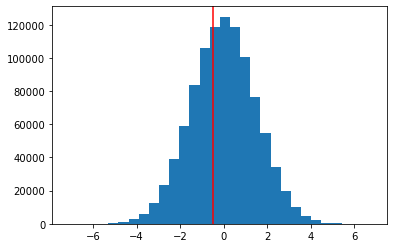

In [11]:
prueba_diferencia_medias(df_male, df_female)

## Se tiene una hormiga en una cinta. Se puede mover en cada paso, un paso a la derecha/izquierda con la misma probabilidad ¿Cual es la probabilidad de que la hormiga regrese al punto inicial depués de $2n$ pasos? 

- Ya que siempre despues de $2n$ pasos dados para regresar al punto inicial tendrias que considerar dar $\frac{1}{2^{n}}$ ahora tengo muchas dudas acerca de esto ya que no se si seria como con el ejemplo de la puerta de que despues de dar un paso ya eliminas la probabilidad del otro paso considerado y la sumas a la probabilidad de los consecuentes posibles parte de esta probabilidad.

## Para uno o más conjuntos de datos de www.data-manual.com/data
   - ¿Quien hizo el conjunto de datos?
   - ¿Que tan grande es?
   - ¿Que significan las columnas?
   - Identificar algunos registros interesantes o familiares
   - Describir estadísticamente cada columna
   - Construir la mátriz de correlación para cada par de columnas 
   - Construir la gráfica de distribución para cada pareja

In [12]:
def obtener_valores_flotantes_tabla(tabla):
    #tabla = pd.read_csv(path)
    numericas = tabla.dtypes == np.dtype('float64')
    columnas_numericas = [key for (key,value) in numericas.to_dict().items() if value]
    tabla_num = tabla[columnas_numericas]
    tabla_num = tabla_num.dropna()
    return tabla_num

In [13]:
def dejar_solo_cifras(txt):
    stri = "".join(c for c in txt if c.isdigit() or c==',' or c=='.')
    return "".join(c.replace(",", ".") for c in stri)

## 1. Ventas continuas de propiedades en Manhattan desde Febrero del 2019 a Enero 2019
   - ¿Quien hizo el conjunto de datos?
        - El departamento de finanzas en ventas continuas [pagina](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)
   - Cuando?
       - Marzo 2018 a Febrero 2019
   - Porque?
       - Para enlistar todas las propiedades que se han vendido  los ultimos doce meses en Manhattan
   - ¿Que tan grande es?
        - 16811 filas x 21 columnas
   - ¿Que significan las columnas?
        - BOROUGH
            - Colonia
        - NEIGHBORHOOD
            - Sector
        - BUILDING CLASS CATEGORY
            - tipo de edificio
        - TAX CLASS AT PRESENT
            - Impuesto en el presente
        - BLOCK
            - Cuadra
        - LOT
            - Terremo
        - EASE-MENT
            - Comodidad
        - BUILDING CLASS AT PRESENT
            - tipo de edificio en el momento
        - ADDRESS
            - Dirección
        - APARTMENT NUMBER
            - numero de departamento
        - ZIP CODE
            - Codigo postal
        - RESIDENTIAL UNITS
            - numero de unidades residenciales
        - COMMERCIAL UNITS
            - numero de unidades comerciales
        - TOTAL UNITS
            - numero total de unidades
        - LAND SQUARE FEET
            - tierra en pies cuadrados
        - GROSS SQUARE FEET
            - pies cuadrados brutos
        - YEAR BUILT
            - Año en que fue construido
        - TAX CLASS AT TIME OF SALE
            - tipo de impuesto al momento de venta
        - BUILDING CLASS AT TIME OF SALE
            - tipo de edificio en el momento de venta
        - SALE PRICE
            - Precio de venta
        - SALE DATE
            - Dia en que se vendio

In [14]:
df_manhatan = pd.read_excel("Kaggle/rollingsales_manhattan.xls")
#Elimino esta columna ya que no aporta nada porque no tiene nada
del df_manhatan['EASE-MENT']
#Elimino esta columna por que es el mismo numero para todas las filas
del df_manhatan['BOROUGH']
df_manhatan.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,189 EAST 7TH STREET,NaN,10009,1.0,0.0,1.0,987.0,2183.0,1860,1,A4,0,2018-05-23
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,189 EAST 7TH STREET,NaN,10009,1.0,0.0,1.0,987.0,2183.0,1860,1,A4,4844809,2018-05-22
2,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,A4,526 EAST 5TH STREET,NaN,10009,1.0,0.0,1.0,1883.0,5200.0,1900,1,A4,6100000,2018-12-03
3,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,B1,113 AVENUE C,NaN,10009,2.0,0.0,2.0,1218.0,4764.0,1899,1,B1,0,2018-04-25
4,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,B9,166 AVENUE A,NaN,10009,2.0,0.0,2.0,1510.0,4520.0,1900,1,B9,0,2018-11-29


- Identifica registros interesantes
   - Las columnas de fecha,dirección,unidades vendidas,total de construcción,total de terreno,año en que se construyo la cas y precio de venta se me hacen interesantes aunque tambien si una persona quiere vencer o comprar tiene que tener en cuenta lo de los impuestos el lugar donde esta 

In [15]:
#Describir estadísticamente cada columna
df_manhatan.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,16806.000000,16806.000000,16806.000000,16805.000000,16805.000000,16805.000000,16805.000000,1.680500e+04,16806.000000,16806.000000,1.680600e+04
mean,1131.538855,729.628526,10013.828514,1.776138,0.393692,2.302053,3949.634573,3.936208e+03,1710.084018,2.127692,3.123327e+06
std,526.260517,889.819185,395.784646,12.641223,5.529225,14.141666,12366.160155,2.955907e+04,643.459799,0.551430,2.737440e+07
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,802.000000,29.000000,10013.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1910.000000,2.000000,9.001000e+04
50%,1171.000000,1002.000000,10022.000000,0.000000,0.000000,1.000000,0.000000,5.130000e+02,1931.000000,2.000000,8.000000e+05
75%,1471.000000,1181.000000,10028.000000,1.000000,0.000000,1.000000,1290.000000,1.325000e+03,1973.000000,2.000000,1.825000e+06
max,2250.000000,9101.000000,10463.000000,597.000000,313.000000,601.000000,191502.000000,1.133549e+06,2018.000000,4.000000,2.397502e+09


In [16]:
#Construir la mátriz de correlación para cada par de columnas
df_manhatan.corr()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BLOCK,1.000000,-0.202731,0.051086,0.047954,-0.016649,0.031911,-0.019165,-0.007248,0.040529,-0.074590,-0.022977
LOT,-0.202731,1.000000,-0.054429,-0.045552,-0.027884,-0.047557,0.232531,-0.049472,-0.242829,0.079566,-0.019512
ZIP CODE,0.051086,-0.054429,1.000000,0.003809,0.001287,0.003693,0.004246,0.001699,0.024931,-0.050980,-0.000683
RESIDENTIAL UNITS,0.047954,-0.045552,0.003809,1.000000,0.025014,0.903101,0.097146,0.444030,0.022514,-0.030521,0.138526
COMMERCIAL UNITS,-0.016649,-0.027884,0.001287,0.025014,1.000000,0.412791,0.065101,0.363449,0.015075,0.205625,0.322329
TOTAL UNITS,0.031911,-0.047557,0.003693,0.903101,0.412791,1.000000,0.110140,0.539300,0.030356,0.052156,0.251033
LAND SQUARE FEET,-0.019165,0.232531,0.004246,0.097146,0.065101,0.110140,1.000000,0.217227,0.033474,0.080724,0.143688
GROSS SQUARE FEET,-0.007248,-0.049472,0.001699,0.444030,0.363449,0.539300,0.217227,1.000000,0.025703,0.219124,0.616196
YEAR BUILT,0.040529,-0.242829,0.024931,0.022514,0.015075,0.030356,0.033474,0.025703,1.000000,-0.163902,0.013159
TAX CLASS AT TIME OF SALE,-0.074590,0.079566,-0.050980,-0.030521,0.205625,0.052156,0.080724,0.219124,-0.163902,1.000000,0.134138


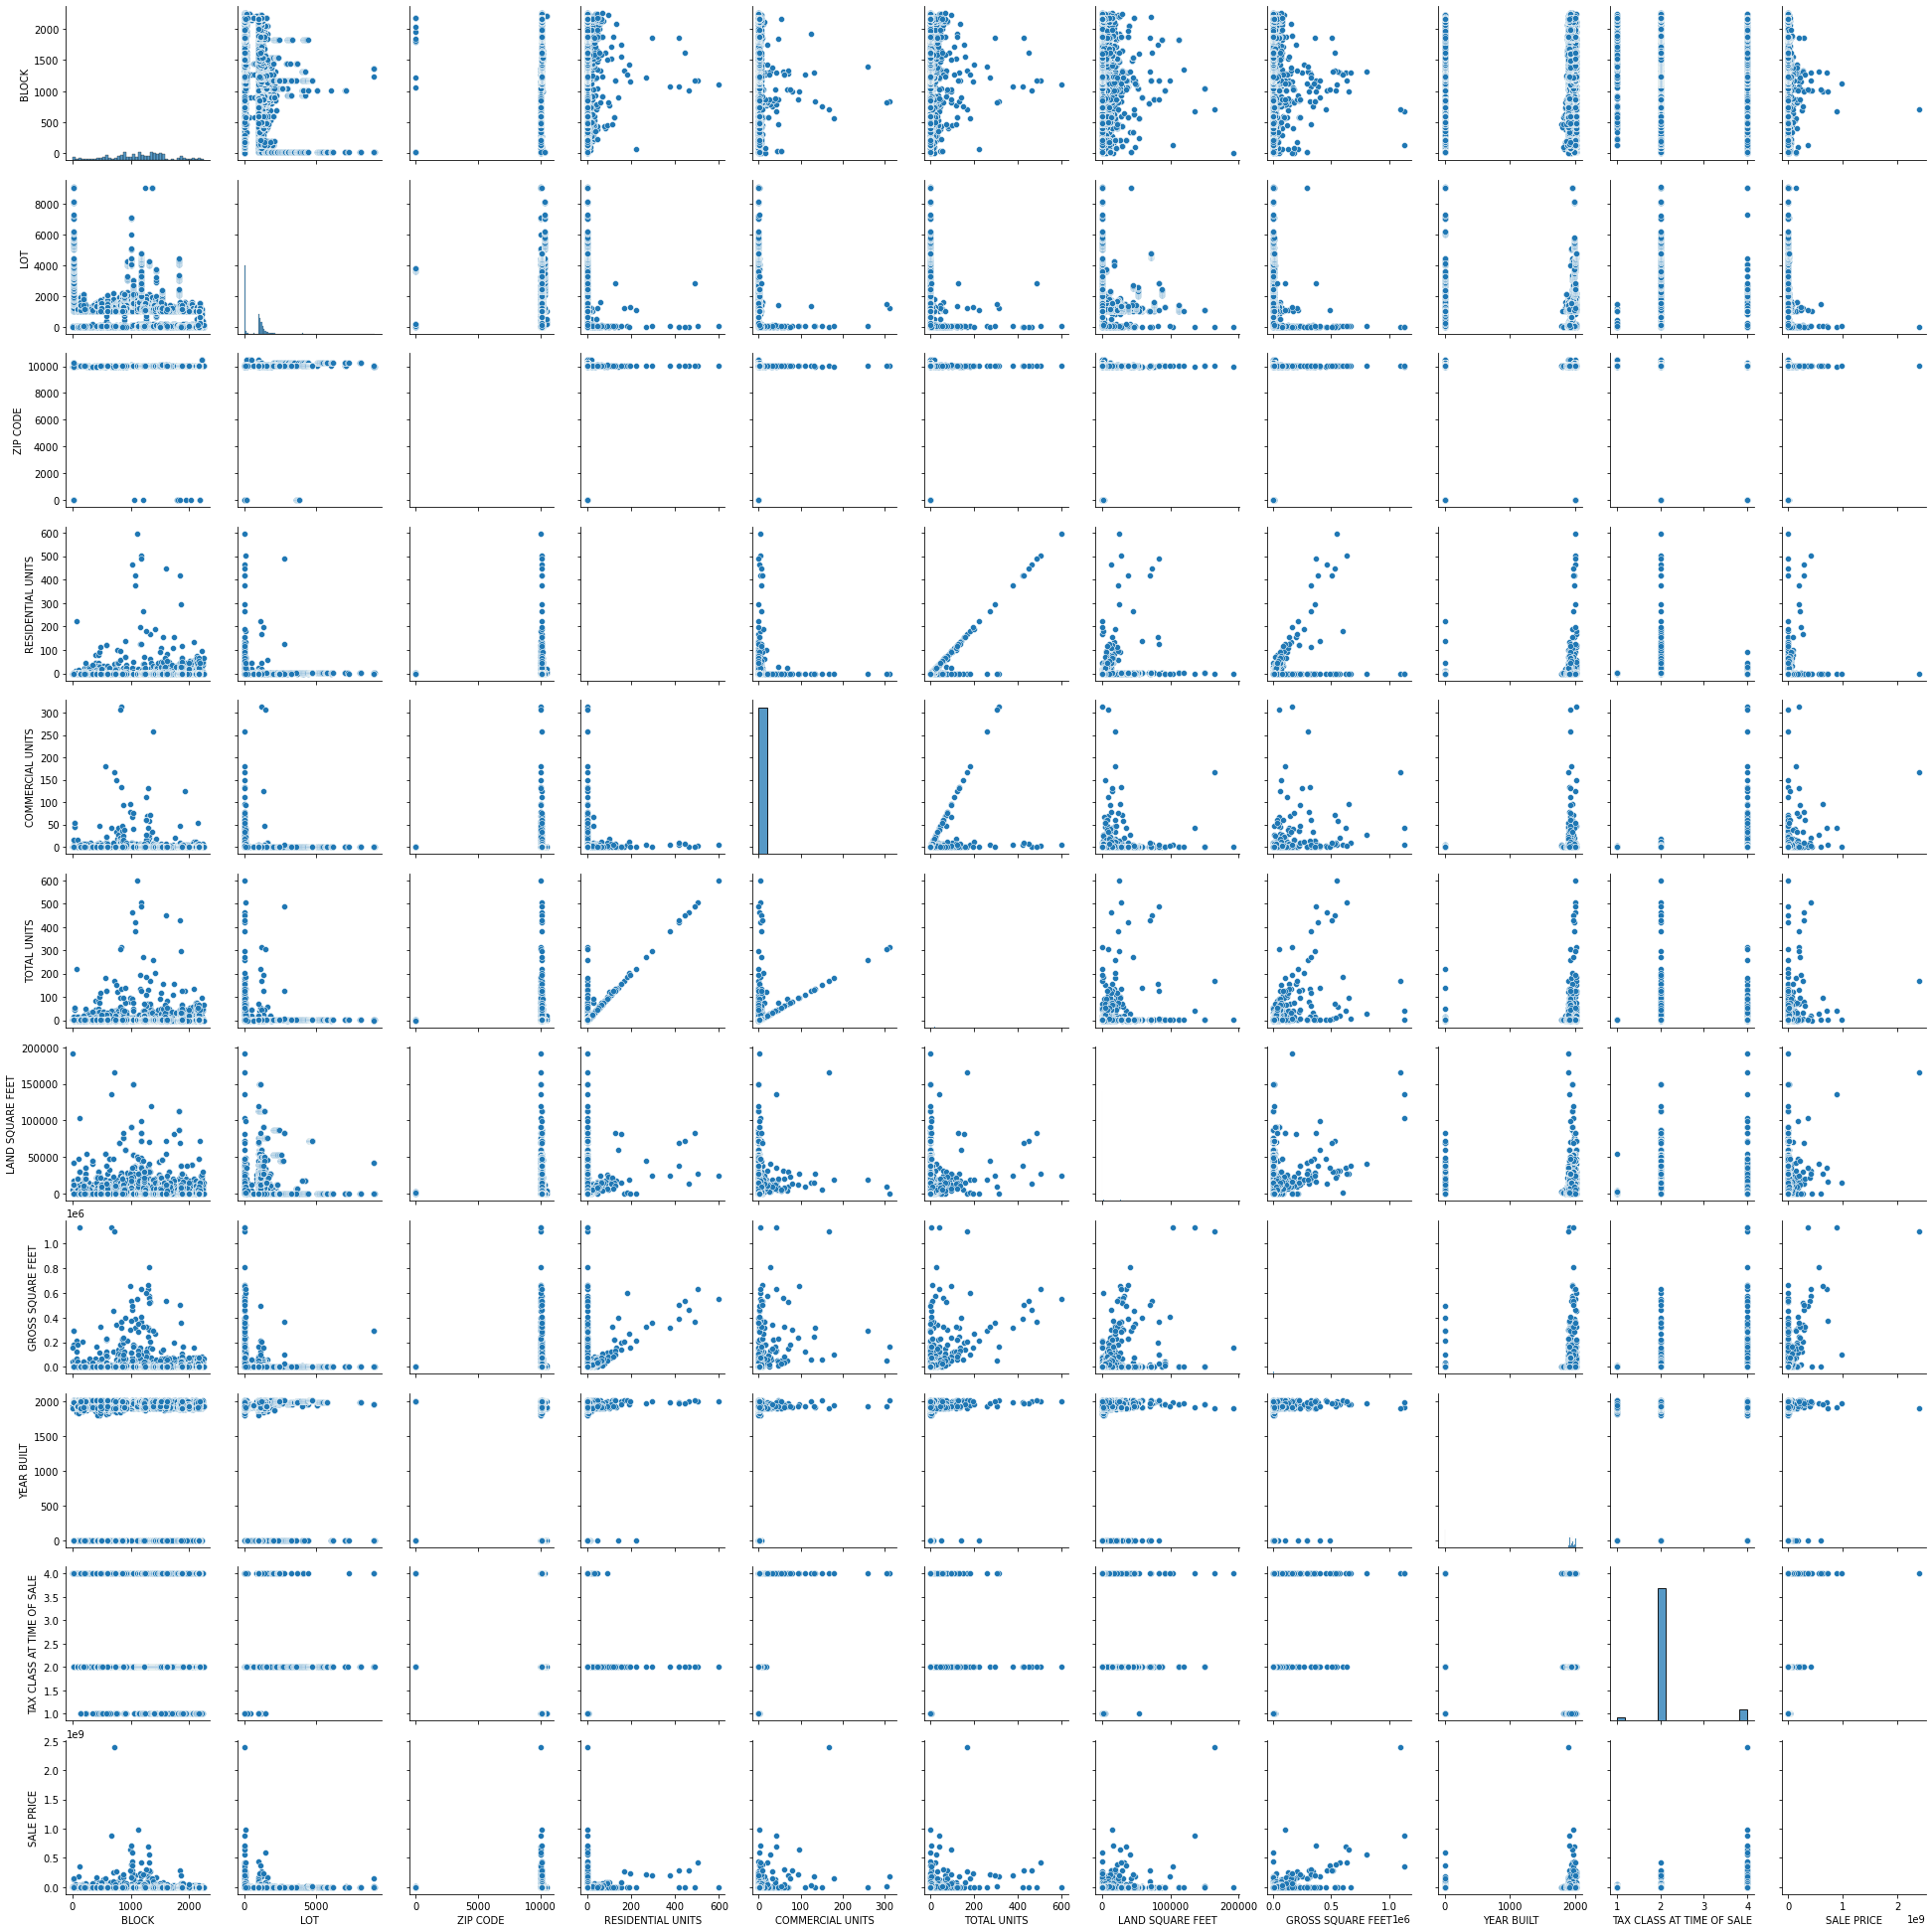

In [17]:
#Construir la gráfica de distribución para cada pareja
sns.pairplot(df_manhatan)

In [18]:
#Yo hice esto para tomar en cuenta solo los registros donde se vendio algo o no pusieron la informacion que deberian 
#o las cantidades de venta son algo atípicas(2 casos)
#Y cuando uno se fija en las tablas y en las graficas si cambian un poco
mascara = df_manhatan['TOTAL UNITS'] > 0
df_manhatan = df_manhatan[mascara]
mascara = df_manhatan['SALE PRICE'] > 0
df_manhatan = df_manhatan[mascara]
mascara = df_manhatan['YEAR BUILT'] > 0
df_manhatan = df_manhatan[mascara]
mascara = df_manhatan['LAND SQUARE FEET'] > 0
df_manhatan = df_manhatan[mascara]
mascara = df_manhatan['GROSS SQUARE FEET'] > 0
df_manhatan = df_manhatan[mascara]
mascara = df_manhatan['SALE PRICE'] < 2.097502e+09
df_manhatan = df_manhatan[mascara]
df_manhatan.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,A4,189 EAST 7TH STREET,NaN,10009,1.0,0.0,1.0,987.0,2183.0,1860,1,A4,4844809,2018-05-22
2,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,A4,526 EAST 5TH STREET,NaN,10009,1.0,0.0,1.0,1883.0,5200.0,1900,1,A4,6100000,2018-12-03
6,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,373,19,C7,332 EAST 4TH STREET,NaN,10009,28.0,2.0,30.0,4651.0,17478.0,1920,2,C7,14000000,2019-01-09
7,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,50,C2,"275 EAST 7TH STREET, GD",NaN,10009,5.0,0.0,5.0,2169.0,6294.0,1900,2,C2,872500,2019-01-25
8,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,C7,133 AVENUE D,NaN,10009,20.0,2.0,22.0,3481.0,14588.0,1930,2,C7,8300000,2018-12-10


In [19]:
#Describir estadísticamente cada columna
df_manhatan.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2.526000e+03,2526.000000,2526.000000,2.526000e+03
mean,1116.498021,929.355899,10026.142914,5.191607,1.250594,6.565321,15604.372526,1.194944e+04,1955.460808,2.106888,1.023170e+07
std,573.507833,896.957512,33.803260,21.888731,9.919885,24.120955,20218.261030,5.770964e+04,46.761242,0.672262,4.566366e+07
min,8.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,33.000000,9.100000e+01,1800.000000,1.000000,1.000000e+00
25%,623.000000,49.000000,10011.000000,1.000000,0.000000,1.000000,2582.000000,9.162500e+02,1910.000000,2.000000,1.275000e+06
50%,1127.500000,1061.500000,10021.000000,1.000000,0.000000,1.000000,7763.000000,1.815000e+03,1940.000000,2.000000,2.625000e+06
75%,1551.000000,1241.000000,10027.000000,2.000000,0.000000,3.000000,19760.000000,5.265000e+03,2007.000000,2.000000,6.643750e+06
max,2241.000000,4753.000000,10463.000000,503.000000,306.000000,506.000000,149560.000000,1.133549e+06,2017.000000,4.000000,9.800000e+08


In [20]:
#Construir la mátriz de correlación para cada par de columnas
df_manhatan.corr()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BLOCK,1.000000,-0.174245,0.342185,0.109803,-0.006099,0.097112,-0.070806,0.015950,-0.177942,-0.058154,-0.018024
LOT,-0.174245,1.000000,-0.005738,-0.191253,-0.093046,-0.210954,0.521515,-0.177432,0.543306,-0.105797,-0.150508
ZIP CODE,0.342185,-0.005738,1.000000,0.034476,-0.029161,0.018367,-0.091420,-0.019952,0.018169,-0.062227,-0.019409
RESIDENTIAL UNITS,0.109803,-0.191253,0.034476,1.000000,0.007120,0.909407,-0.021194,0.388988,-0.069576,-0.033501,0.262999
COMMERCIAL UNITS,-0.006099,-0.093046,-0.029161,0.007120,1.000000,0.417211,-0.000739,0.362616,-0.050305,0.296363,0.292750
TOTAL UNITS,0.097112,-0.210954,0.018367,0.909407,0.417211,1.000000,-0.021690,0.502166,-0.080110,0.090620,0.358729
LAND SQUARE FEET,-0.070806,0.521515,-0.091420,-0.021194,-0.000739,-0.021690,1.000000,0.114156,0.291676,0.023318,0.076608
GROSS SQUARE FEET,0.015950,-0.177432,-0.019952,0.388988,0.362616,0.502166,0.114156,1.000000,-0.043026,0.298186,0.781661
YEAR BUILT,-0.177942,0.543306,0.018169,-0.069576,-0.050305,-0.080110,0.291676,-0.043026,1.000000,-0.010815,-0.039592
TAX CLASS AT TIME OF SALE,-0.058154,-0.105797,-0.062227,-0.033501,0.296363,0.090620,0.023318,0.298186,-0.010815,1.000000,0.290412


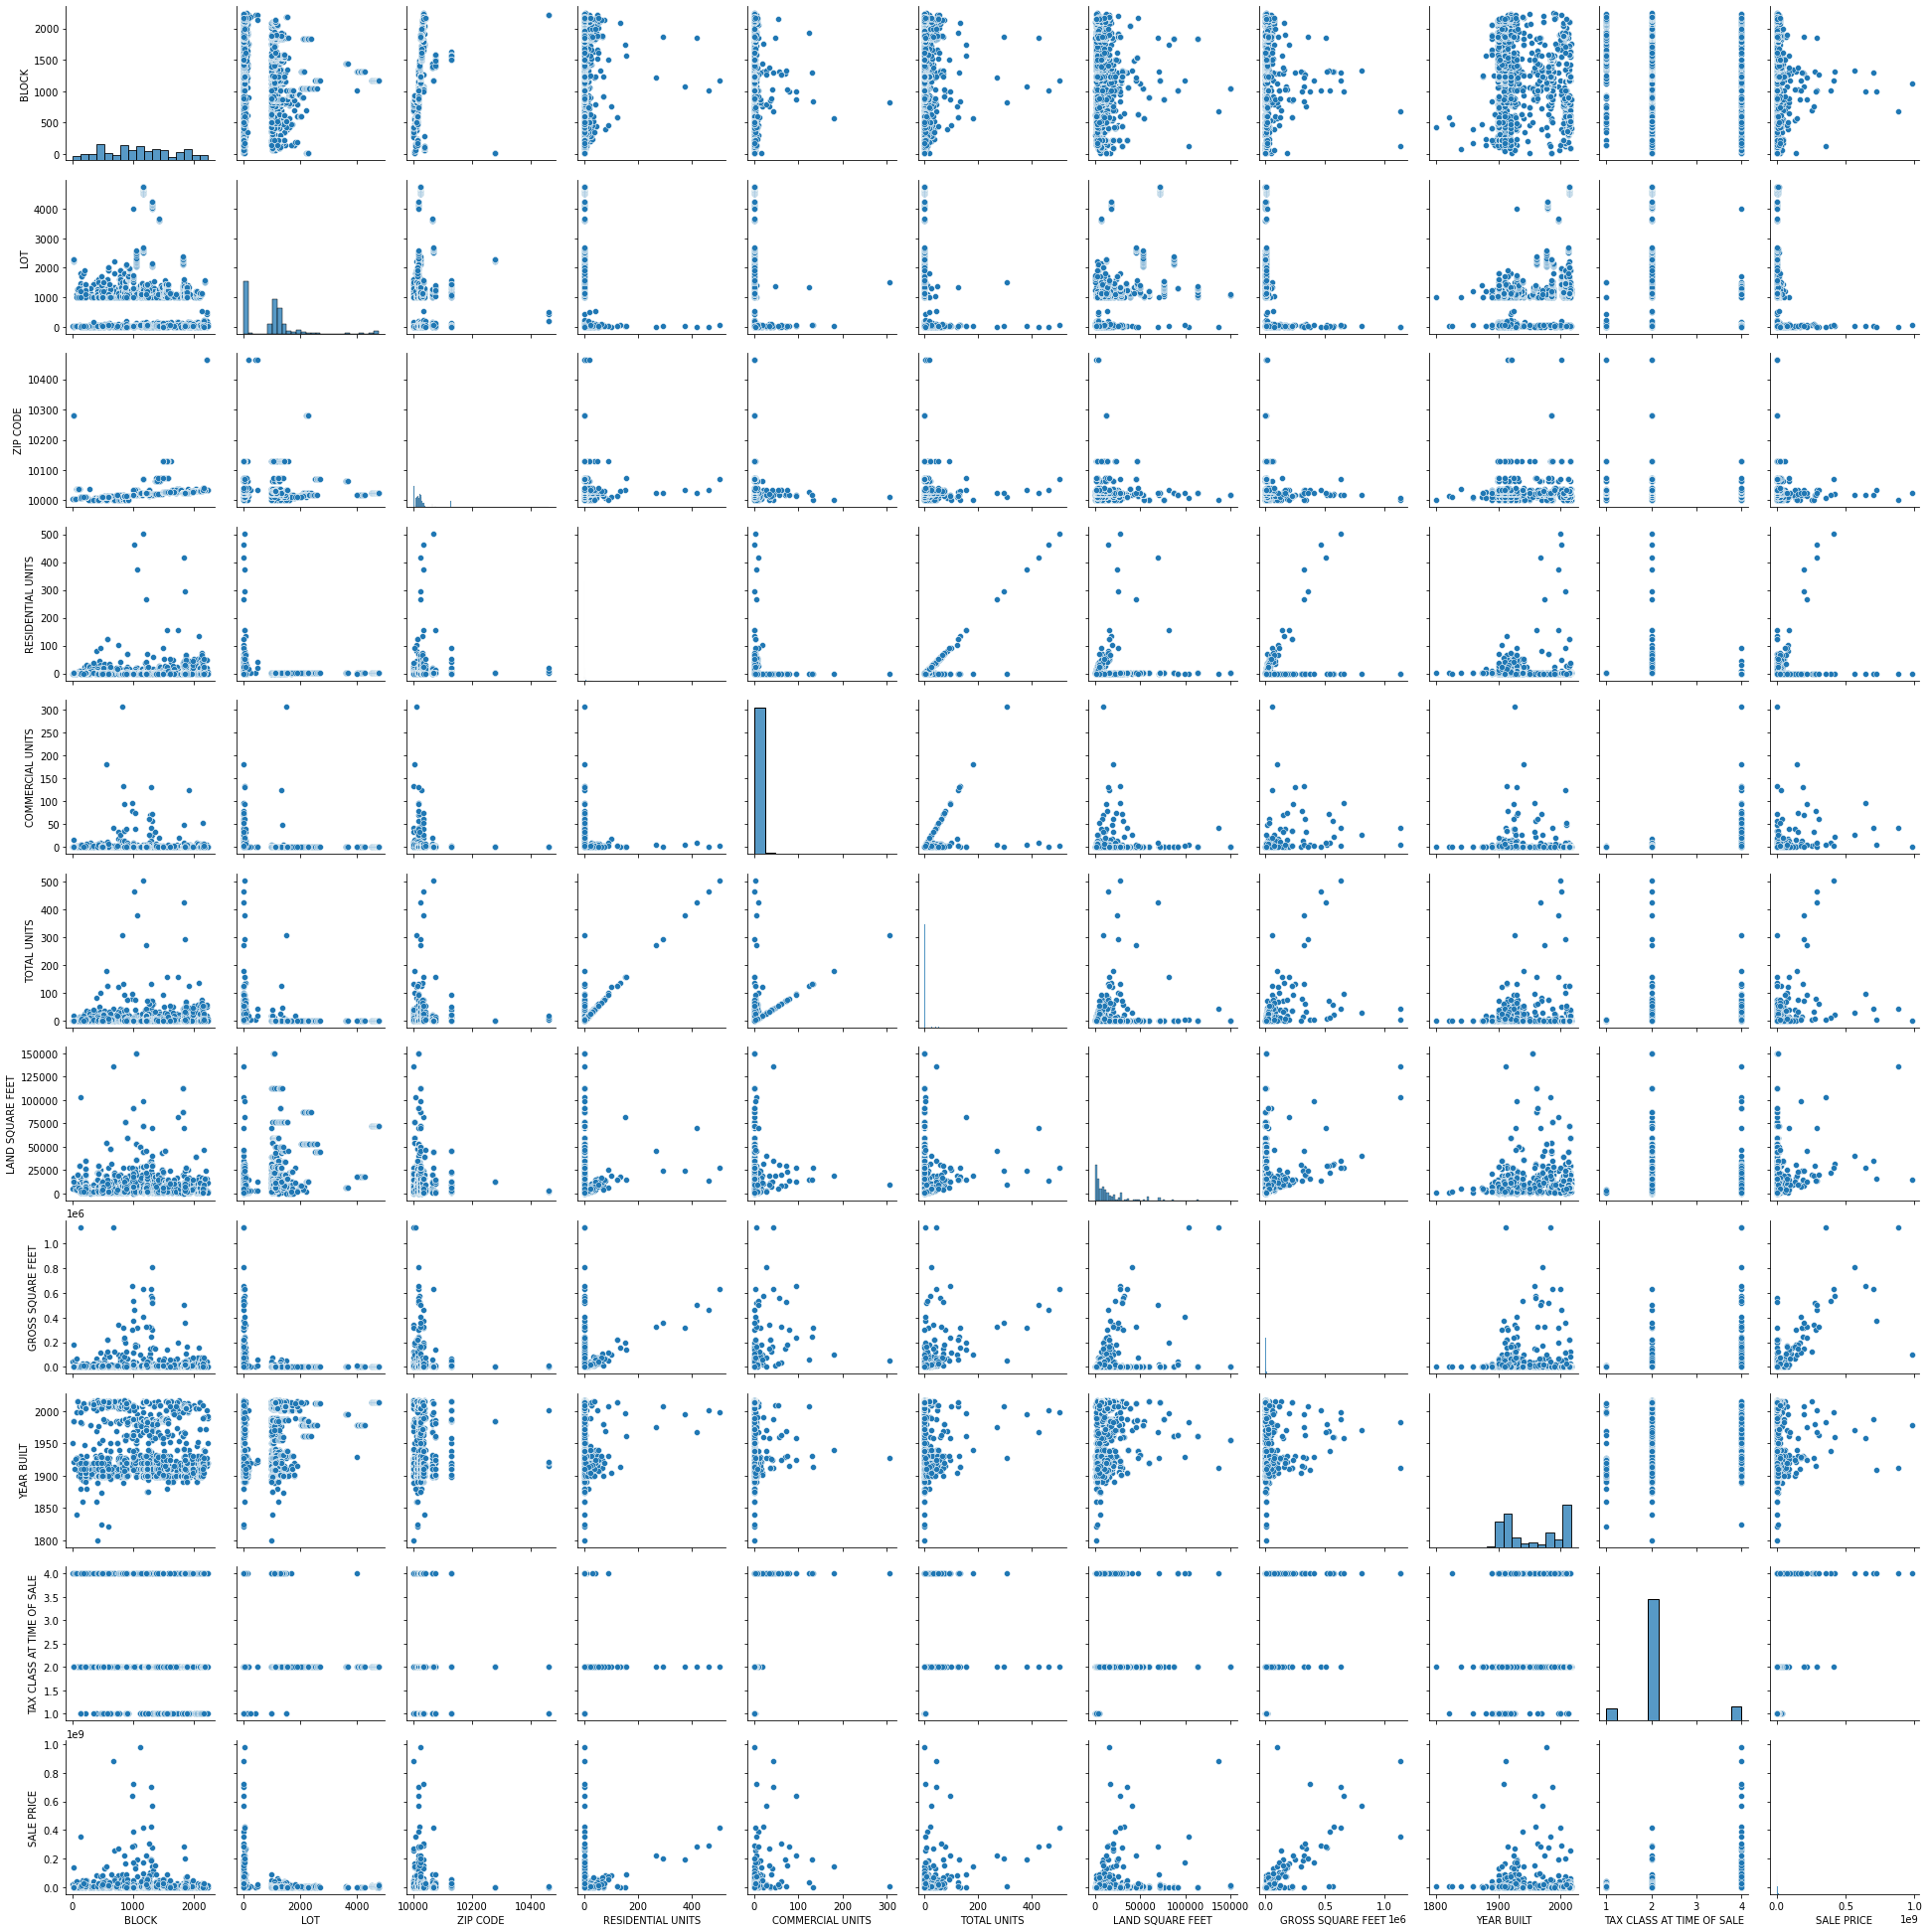

In [21]:
#Construir la gráfica de distribución para cada pareja
sns.pairplot(df_manhatan)

# 2. Peliculas
   - ¿Quien hizo el conjunto de datos?
        - No encontre de donde viene el conjunto
   - ¿Que tan grande es?
        - 3202 filas x 16 columnas
   - ¿Que significan las columnas?
        - Title
            - Titulo
        - US Gross
            - Taquilla en USA
        - Worldwide Gross
            - Taquilla a nivel mundial
        - US DVD Sales
            - Numero de DVD´S vendidos en USA
        - Production Budget
            - Presupuesto de producción
        - Release Date
            - Fecha de Estreno
        - MPAA Rating
            - Calificación en MPAA
        - Running Time(min)
            - Duracón de la pelicula
        - Distributor
            - Concesionario
        - Source
            - Fuente
        - Major Genre
            - Genero principal
        - Creative Type
            - Tipo de creación
        - Director
            - Director
        - Rotten Tomatoes Rating
            - Calificación en Rotten Tomatoes
        - IMDB Rating
            - Calificación en IMDB
        - IMDB Votes
            - Numero de votos en IMDB

In [22]:
movies_df = pd.read_csv("Kaggle/movies.csv")
del movies_df['IMDB Votes']
movies_df.dtypes

Title                      object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
dtype: object

- Identifica registros interesantes
     - En general todos los campos se me hacen interesantes excepto el MPAA rating y el número de votos en IMDB(Si ya tienes el raiting para que quieres los votos??)

In [23]:
# Ya que US Gross y Worldwide Gross son de tipo object y yo necesito que sean de tipo entero o flotante las converti de esta manera  
# MPAA Rating no lo tome en cuenta porque no me intereso
movies_df["US_Gross"] = movies_df["US Gross"].astype(str)
movies_df["Worldwide_Gross"] = movies_df["Worldwide Gross"].astype(str)

movies_df.US_Gross = movies_df.US_Gross.map(dejar_solo_cifras)
movies_df.Worldwide_Gross = movies_df.Worldwide_Gross.map(dejar_solo_cifras)

movies_df = movies_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
df_m1 = obtener_valores_flotantes_tabla(movies_df)
movies_df.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,US_Gross,Worldwide_Gross
0,The Land Girls,146083,146083,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,146083.0,146083.0
1,"First Love, Last Rites",10876,10876,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,10876.0,10876.0
2,I Married a Strange Person,203134,203134,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,203134.0,203134.0
3,Let's Talk About Sex,373615,373615,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,373615.0,373615.0
4,Slam,1009819,1087521,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,1009819.0,1087521.0


In [24]:
# Describir estadísticamente cada columna
df_m1.describe()

,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,US_Gross,Worldwide_Gross
count,2.380000e+02,2.380000e+02,238.000000,238.000000,238.000000,2.380000e+02,2.380000e+02
mean,4.618473e+07,5.731981e+07,111.247899,52.655462,6.652101,7.933551e+07,1.720018e+08
std,5.719274e+07,5.594812e+07,19.552631,27.550471,1.123575,8.930752e+07,2.168708e+08
min,6.184540e+05,1.500000e+04,74.000000,1.000000,1.700000,1.237615e+06,1.237615e+06
25%,1.268644e+07,2.000000e+07,96.250000,27.250000,6.000000,1.983203e+07,3.812948e+07
50%,2.555234e+07,3.500000e+07,108.000000,53.500000,6.800000,4.397966e+07,8.778826e+07
75%,5.031880e+07,7.500000e+07,122.000000,76.000000,7.500000,1.090639e+08,1.928033e+08
max,3.208309e+08,3.000000e+08,187.000000,98.000000,8.900000,5.333454e+08,1.065660e+09


In [25]:
# Construir la mátriz de correlación para cada par de columnas
df_m1.corr()

,US DVD Sales,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,US_Gross,Worldwide_Gross
US DVD Sales,1.000000,0.627868,0.282269,0.251339,0.238247,0.820142,0.820576
Production Budget,0.627868,1.000000,0.387806,0.153399,0.141427,0.734367,0.796305
Running Time (min),0.282269,0.387806,1.000000,0.295527,0.410214,0.313552,0.387414
Rotten Tomatoes Rating,0.251339,0.153399,0.295527,1.000000,0.773842,0.281864,0.278903
IMDB Rating,0.238247,0.141427,0.410214,0.773842,1.000000,0.244718,0.250643
US_Gross,0.820142,0.734367,0.313552,0.281864,0.244718,1.000000,0.949706
Worldwide_Gross,0.820576,0.796305,0.387414,0.278903,0.250643,0.949706,1.000000


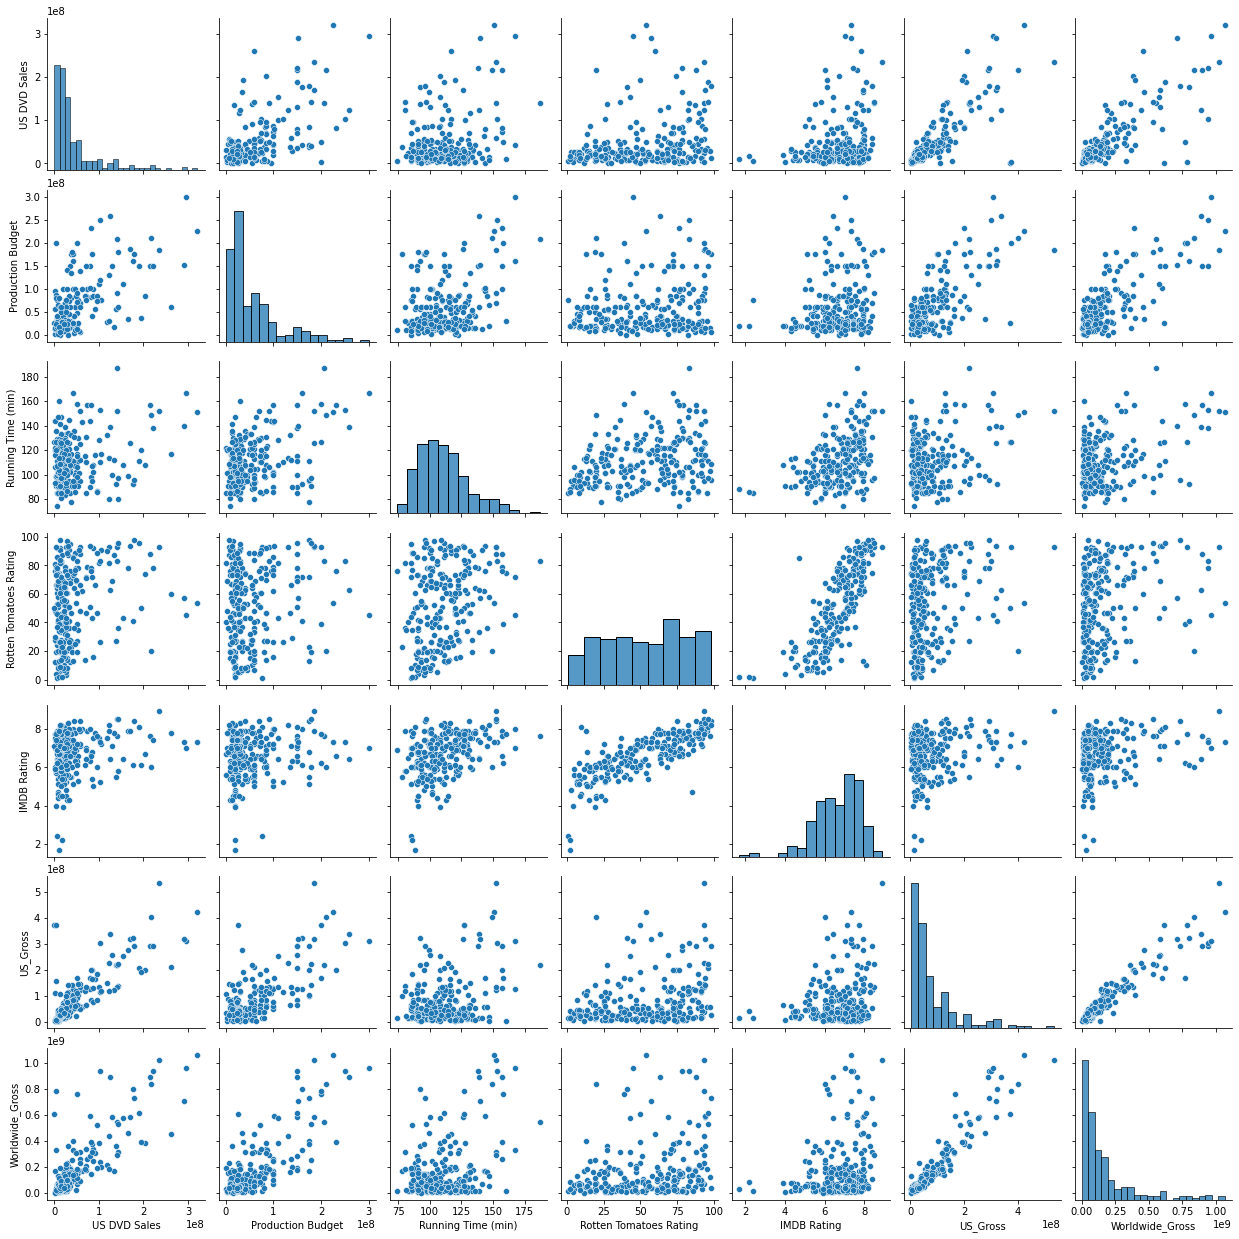

In [26]:
# Construir la gráfica de distribución para cada pareja
sns.pairplot(df_m1)

# 3. Trafico de las redes de computadoras 
   - ¿Quien hizo el conjunto de datos?
        - Chris Crawford de esta [pagina](https://www.kaggle.com/crawford/computer-network-traffic)
   - Cuando?
       - Hace dos años
   - Porque?
       - Para observar la "odd " actividad o sospecha acerca de el comportamiento de una maquina desencadeno investigaciones den los dias siguientes aunque la maquina haya sido comprometida antes(hay que ver que solo son 9 equipos)
   - ¿Que tan grande es?
        - 20804 filas x 4 columnas
   - ¿Que significan las columnas?
        - date : yyyy-mm-dd (from 2006-07-01 to 2006-09-30) 
            - fecha en año-mes-dia(desde 2006-07-01 to 2006-09-30)
        - l_ipn : local IP (an integer value from 0-9)
            - IP local(el cual es un valor entero de 0-9)
        - r_asn : remote ASN (an identifier for a remote ASN)
            - ASN remoto(Distribución de números autónomo) 
        - f : flows (count of connections for the day)
            - flujo(numero de conecciones por dia)

In [27]:
networks_df = pd.read_csv("Kaggle/cs448b_ipasn.csv")
networks_df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


- Identifica registros interesantes
     - Pues como solo son 10 computadoras y te dice el numero de conexiones por dia de esas computadoras es interesante este dato

In [28]:
# Describir estadísticamente cada columna
networks_df.describe()

,l_ipn,r_asn,f
count,20803.000000,20803.000000,20803.000000
mean,4.228236,12138.320338,93.914243
std,3.278183,9766.324252,5764.995269
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,784234.000000


In [29]:
#Construir la mátriz de correlación para cada par de columnas
networks_df.corr()

,l_ipn,r_asn,f
l_ipn,1.000000,0.019910,-0.001781
r_asn,0.019910,1.000000,-0.007217
f,-0.001781,-0.007217,1.000000


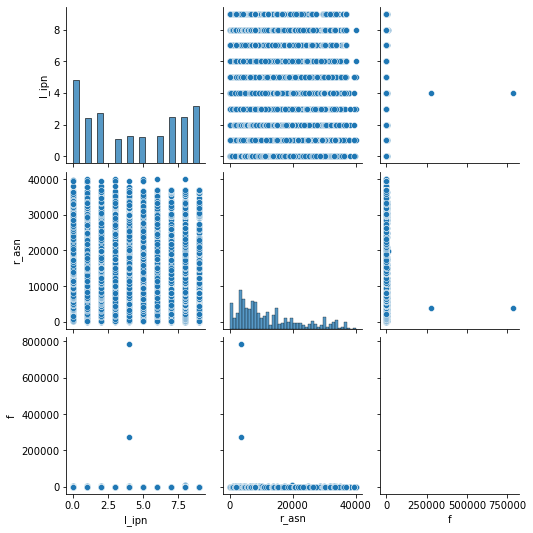

In [30]:
# Construir la gráfica de distribución para cada pareja
sns.pairplot(networks_df)

### Se observa en la grafica dos valores claramente atípicos

In [31]:
#Quite los valores atipicos para tener una mejor grafica
mascara = networks_df['f'] < 6000
networks_df = networks_df[mascara]
networks_df.describe()

,l_ipn,r_asn,f
count,20799.000000,20799.000000,20799.000000
mean,4.227896,12138.386653,42.292995
std,3.278289,9766.612621,247.544155
min,0.000000,3.000000,1.000000
25%,1.000000,4323.000000,1.000000
50%,4.000000,8764.000000,2.000000
75%,7.000000,17676.000000,8.000000
max,9.000000,40092.000000,5214.000000


In [32]:
#Construir la mátriz de correlación para cada par de columnas
networks_df.corr()

,l_ipn,r_asn,f
l_ipn,1.000000,0.019818,-0.030683
r_asn,0.019818,1.000000,0.007655
f,-0.030683,0.007655,1.000000


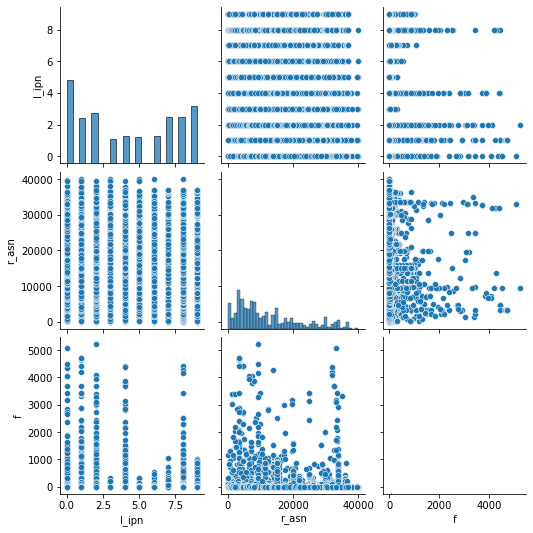

In [33]:
sns.pairplot(networks_df)

# 4. Juegos Olimpicos de Londres
   - ¿Quien hizo el conjunto de datos?
        - No se si lo sacaron de [aqui](https://www.kaggle.com/the-guardian/olympic-games/version/1) o de [aqui](https://www.kaggle.com/ostrowski/olympics-1896-2012) pero puede ser tendria que analizar los datos y verificarlos
   - Cuando?
       - No se
   - Porque?
       - No se
   - ¿Que tan grande es?
        - 21 filas x 6 columnas
   - ¿Que significan las columnas?
        - ISO country code
            - ISO codigo del país
        - Country name
            - Nombre del país 
        - 2011 GDP
            - PIB del país en el 2011
        - 2010 population
            - Población en el 2010
        - Female count
            - Numero de mujeres
        - Male count
            - Numero de hombres
        - Gold medals
            - Medallas de oro
        - Silver medals
            - Medallas de plata
        - Bronze medals
            - Medallas de bronce

In [34]:
olimpics_df = pd.read_csv("Kaggle/olympics.csv")
#olimpics_df

In [35]:
#Describir estadísticamente cada columna
olimpics_df.describe()

,2011 GDP,2010 population,Female count,Male count,Gold medals,Silver medals,Bronze medals
count,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.274939e+12,1.827455e+08,93.300000,99.600000,9.400000,8.500000,9.350000
std,3.671919e+12,3.847068e+08,97.431812,96.086803,13.781758,10.023656,10.001447
min,8.160541e+08,1.040000e+05,3.000000,6.000000,0.000000,0.000000,0.000000
25%,8.365026e+09,3.008000e+06,10.750000,15.750000,0.000000,0.750000,2.000000
50%,9.315249e+11,4.253606e+07,32.500000,44.500000,3.500000,3.500000,4.000000
75%,2.550745e+12,1.310258e+08,165.500000,169.000000,11.000000,14.750000,14.750000
max,1.509400e+13,1.338300e+09,271.000000,287.000000,46.000000,29.000000,32.000000


In [36]:
#Construir la mátriz de correlación para cada par de columnas
olimpics_df.corr()

,2011 GDP,2010 population,Female count,Male count,Gold medals,Silver medals,Bronze medals
2011 GDP,1.000000,0.396250,0.743981,0.685857,0.826866,0.792383,0.749309
2010 population,0.396250,1.000000,0.247769,0.200365,0.393345,0.366270,0.311982
Female count,0.743981,0.247769,1.000000,0.971239,0.878679,0.931082,0.940813
Male count,0.685857,0.200365,0.971239,1.000000,0.798596,0.873622,0.879275
Gold medals,0.826866,0.393345,0.878679,0.798596,1.000000,0.919333,0.884413
Silver medals,0.792383,0.366270,0.931082,0.873622,0.919333,1.000000,0.970458
Bronze medals,0.749309,0.311982,0.940813,0.879275,0.884413,0.970458,1.000000


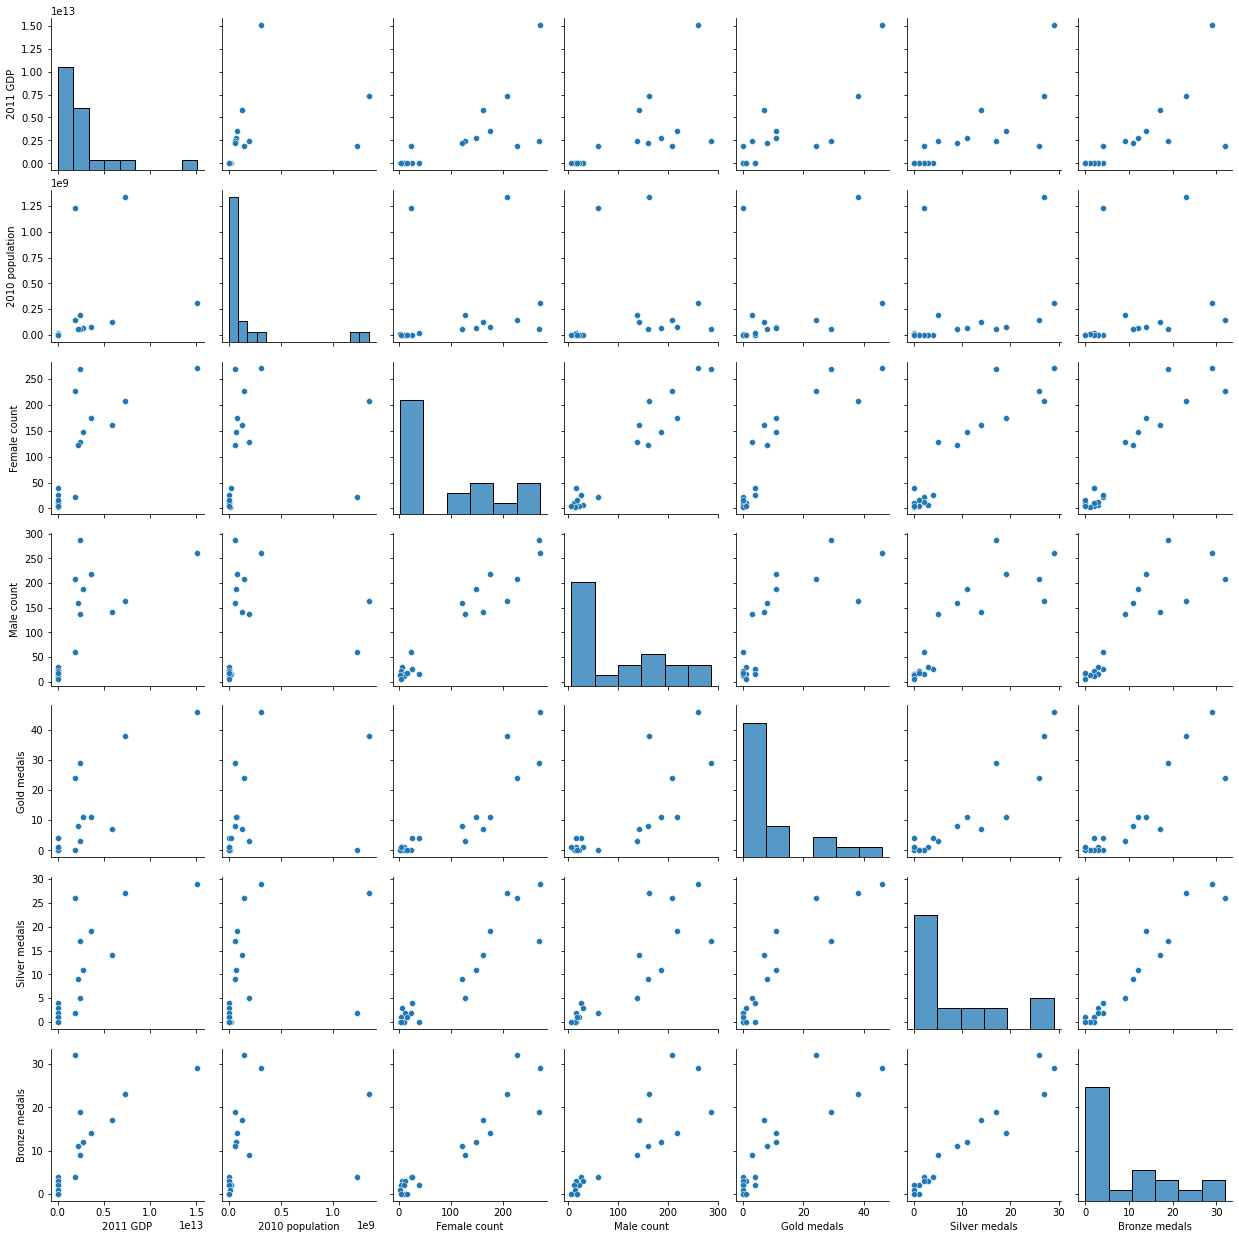

In [37]:
#Construir la gráfica de distribución para cada pareja
sns.pairplot(olimpics_df)

## Construir una visualización interactiva de tu conjunto de datos favorito 

In [38]:
anime = pd.read_csv("Kaggle/rating.csv/anime.csv")
anime = anime.dropna()
anime.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Kaggle/rating.csv/anime.csv'

In [ ]:
anime["name"] = anime["name"].astype(str)
anime["episodes"] = pd.to_numeric(anime["episodes"], errors='coerce')
anime.dtypes

In [ ]:
anime.describe()

### Hice estas cuatro animaciones porque se me hizo interesante ver como se relacionan o que complicaciones pueden existir al analizar los datos y pues porque se me hizo chido hacerlo asi.

In [ ]:
output_notebook()
output_file("layout1.html")

TOOLTIPS =[
        ( 'Genre',  '@genre'),
        ( 'name',  '@{name}' ), # use @{ } for field names with spaces
        ( 'members', '@members'),
        ( 'Rating',  '@rating'),
        ( 'Episodes',  '@episodes'),
    ]

TYPE = ['TV', 'Movie',"OVA","","Special","Music","ONA"]
MARKERS = ['hex', 'circle_x',"diamond_cross","circle","square","triangle","diamond"]

p = figure(title="Anime",plot_width=1300,plot_height=700,y_axis_type='log',x_axis_type='log', tooltips=TOOLTIPS)
p.xaxis.axis_label = 'Rating'
p.yaxis.axis_label = 'Members'

p.scatter("rating", "members", source=anime, legend="type", fill_alpha=0.7, size=10,
          marker=factor_mark('type', MARKERS, TYPE),
          color=factor_cmap('type', 'Category10_7', TYPE))
show(p)

In [ ]:
output_notebook()
output_file("layout2.html")

TOOLTIPS =[
        ( 'Genre',  '@genre'),
        ( 'name',  '@{name}' ), # use @{ } for field names with spaces
        ( 'members', '@members'),
        ( 'Rating',  '@rating'),
        ( 'Episodes',  '@episodes'),
    ]

TYPE = ['TV', 'Movie',"OVA","","Special","Music","ONA"]
MARKERS = ['hex', 'circle_x',"diamond_cross","circle","square","triangle","diamond"]

p = figure(title="Anime",plot_width=1300,plot_height=700,y_axis_type='log',x_axis_type='log', tooltips=TOOLTIPS)
p.yaxis.axis_label = 'Rating'
p.xaxis.axis_label = 'Members'

p.scatter("members","rating", source=anime, legend="type", fill_alpha=0.7, size=10,
          marker=factor_mark('type', MARKERS, TYPE),
          color=factor_cmap('type', 'Category10_7', TYPE))
show(p)

In [ ]:
output_notebook()
output_file("layout3.html")

TOOLTIPS =[
        ( 'Genre',  '@genre'),
        ( 'name',  '@{name}' ), # use @{ } for field names with spaces
        ( 'members', '@members'),
        ( 'Rating',  '@rating'),
        ( 'Episodes',  '@episodes'),
    ]

TYPE = ['TV', 'Movie',"OVA","","Special","Music","ONA"]
MARKERS = ['hex', 'circle_x',"diamond_cross","circle","square","triangle","diamond"]

p = figure(title="Anime",plot_width=1300,plot_height=650, tooltips=TOOLTIPS ,y_axis_type='log',x_axis_type='log')
p.xaxis.axis_label = 'Members'
p.yaxis.axis_label = 'Episodes'

p.scatter("members" ,"episodes",source=anime, legend="type", fill_alpha=0.7, size=10,
          marker=factor_mark('type', MARKERS, TYPE),
          color=factor_cmap('type', 'Category10_7', TYPE))
show(p)

In [ ]:
output_notebook()
output_file("layout4.html")

TOOLTIPS =[
        ( 'Genre',  '@genre'),
        ( 'name',  '@{name}' ), # use @{ } for field names with spaces
        ( 'members', '@members'),
        ( 'Rating',  '@rating'),
        ( 'Episodes',  '@episodes'),
    ]

TYPE = ['TV', 'Movie',"OVA","","Special","Music","ONA"]
MARKERS = ['hex', 'circle_x',"diamond_cross","circle","square","triangle","diamond"]

p = figure(title="Anime",plot_width=1300,plot_height=650, tooltips=TOOLTIPS ,y_axis_type='log',x_axis_type='log')
p.yaxis.axis_label = 'Members'
p.xaxis.axis_label = 'Episodes'

p.scatter("episodes","members" ,source=anime, legend="type", fill_alpha=0.7, size=10,
          marker=factor_mark('type', MARKERS, TYPE),
          color=factor_cmap('type', 'Category10_7', TYPE))
show(p)